<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Fuzzy_exemplos_cap_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exemplo do cap 18 - FUZZY**

In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

60.57441249431211


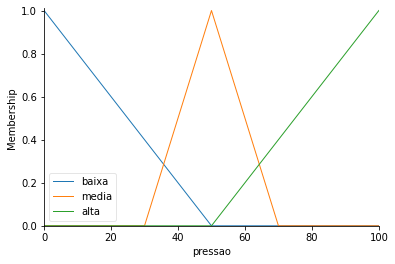

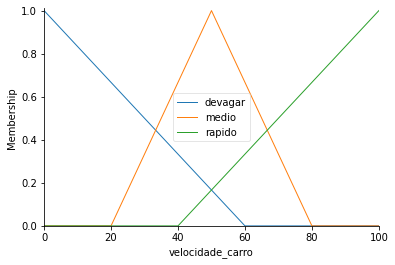

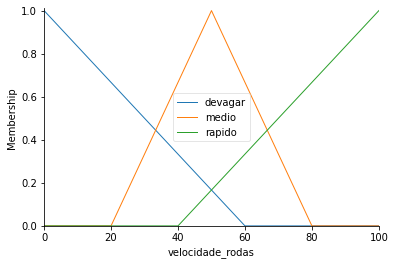

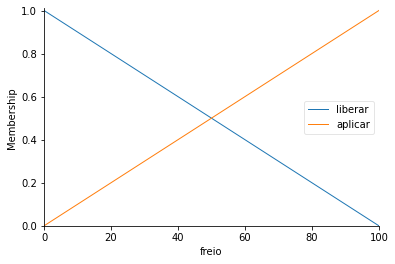

In [ ]:


pressao = ctrl.Antecedent(np.arange(0,101,1), 'pressao')
velocidade_carro = ctrl.Antecedent(np.arange(0,101,1), 'velocidade_carro')
velocidade_rodas = ctrl.Antecedent(np.arange(0,101,1), 'velocidade_rodas')

freio = ctrl.Consequent(np.arange(0,101,1), 'freio')

freio['liberar'] = fuzzy.trimf(freio.universe, [0, 0 ,100])
freio['aplicar'] = fuzzy.trapmf(freio.universe, [0, 100 ,100, 100])

pressao['baixa'] = fuzzy.trimf(pressao.universe, [0, 0 ,50])
pressao['media'] = fuzzy.trimf(pressao.universe, [30, 50 , 70])
pressao['alta'] = fuzzy.trapmf(pressao.universe, [50, 100, 100, 100])

velocidade_rodas['devagar'] = fuzzy.trimf(velocidade_rodas.universe, [0, 0, 60])
velocidade_rodas['medio'] = fuzzy.trimf(velocidade_rodas.universe, [20, 50, 80])
velocidade_rodas['rapido'] = fuzzy.trapmf(velocidade_rodas.universe, [40, 100, 100, 100])

velocidade_carro['devagar'] = fuzzy.trimf(velocidade_carro.universe, [0, 0, 60])
velocidade_carro['medio'] = fuzzy.trimf(velocidade_carro.universe, [20, 50, 80])
velocidade_carro['rapido'] = fuzzy.trapmf(velocidade_carro.universe, [40, 100, 100, 100])


pressao.view()
velocidade_carro.view()
velocidade_rodas.view()
freio.view()


rule1 = ctrl.Rule(pressao['media'], freio['aplicar'])
rule2 = ctrl.Rule(pressao['alta'] & velocidade_carro['rapido'] & velocidade_rodas['rapido'], freio['aplicar'])
rule3 = ctrl.Rule(pressao['alta'] & velocidade_carro['rapido'] & velocidade_rodas['devagar'], freio['liberar'])
rule4 = ctrl.Rule(pressao['baixa'], freio['liberar'])

freio_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
freio_simulador = ctrl.ControlSystemSimulation(freio_ctrl)


freio_simulador.input['pressao'] = 60
freio_simulador.input['velocidade_rodas'] = 55
freio_simulador.input['velocidade_carro'] = 80
freio_simulador.compute()
print(freio_simulador.output['freio'])

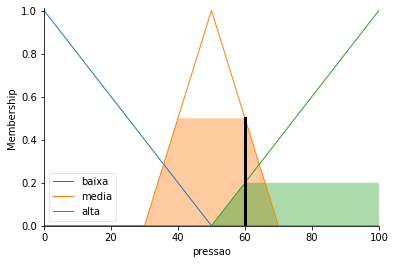

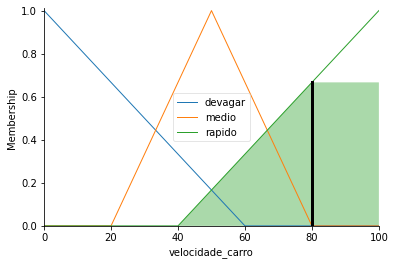

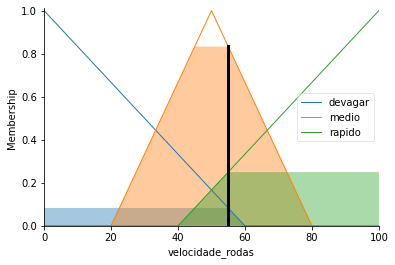

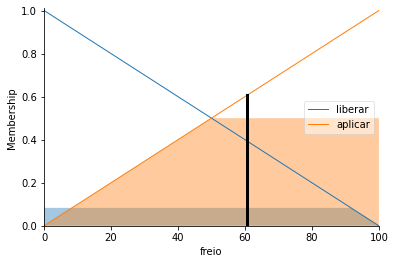

In [ ]:
pressao.view(sim=freio_simulador)
velocidade_carro.view(sim=freio_simulador)
velocidade_rodas.view(sim=freio_simulador)
freio.view(sim=freio_simulador)


49.78653219876036


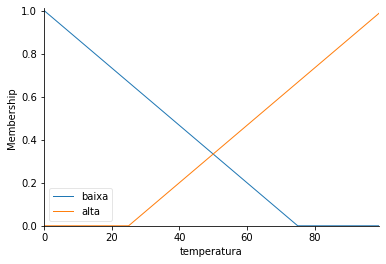

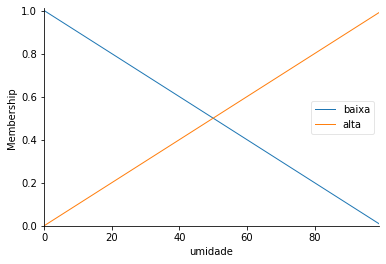

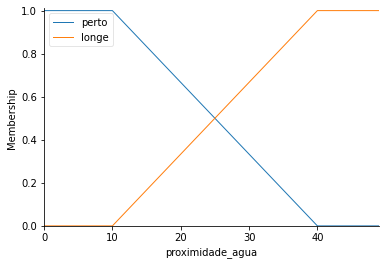

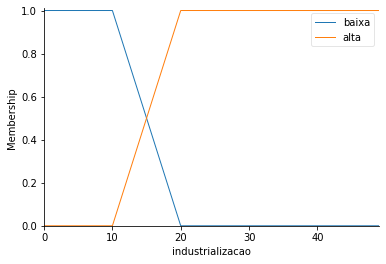

In [ ]:
temperatura = ctrl.Antecedent(np.arange(0,100,1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0,100,1), 'umidade')
proximidade_agua = ctrl.Antecedent(np.arange(0,50,1), 'proximidade_agua')
industrializacao = ctrl.Antecedent(np.arange(0,50,1), 'industrializacao')

dose = ctrl.Consequent(np.arange(0,100,1), 'dose')

dose['media'] = fuzzy.trimf(dose.universe, [0, 0 ,10])
dose['baixa'] = fuzzy.trimf(dose.universe, [0, 0 ,50])
dose['alta'] = fuzzy.trimf(dose.universe, [40, 100 ,100])

temperatura['baixa'] = fuzzy.trimf(temperatura.universe, [0, 0 ,75])
temperatura['alta'] = fuzzy.trimf(temperatura.universe, [25,100,100])

umidade['baixa'] = fuzzy.trimf(umidade.universe, [0, 0, 100])
umidade['alta'] = fuzzy.trimf(umidade.universe, [0, 100, 100])

proximidade_agua['perto'] = fuzzy.trapmf(proximidade_agua.universe, [0, 0, 10, 40])
proximidade_agua['longe'] = fuzzy.trapmf(proximidade_agua.universe, [10, 40, 50, 50])

industrializacao['baixa'] = fuzzy.trapmf(industrializacao.universe, [0, 0, 10, 20])
industrializacao['alta'] = fuzzy.trapmf(industrializacao.universe, [10, 20, 50, 50])


temperatura.view()
umidade.view()
proximidade_agua.view()
industrializacao.view()


rule1 = ctrl.Rule(temperatura['alta'] & umidade['alta'] & proximidade_agua['perto'] & industrializacao['baixa'], dose['alta'])
rule2 = ctrl.Rule(industrializacao['alta'], dose['baixa'])
rule3 = ctrl.Rule((((umidade['alta'] & temperatura['alta']) & industrializacao['baixa']) | proximidade_agua['perto']) , dose['alta'])
rule4 = ctrl.Rule(temperatura['baixa'] & umidade['baixa'], dose['baixa'])

dose_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
dose_simulador = ctrl.ControlSystemSimulation(dose_ctrl)


dose_simulador.input['temperatura'] = 80  
dose_simulador.input['umidade'] = 10
dose_simulador.input['proximidade_agua'] = 15
dose_simulador.input['industrializacao'] = 90
dose_simulador.compute()
print(dose_simulador.output['dose'])

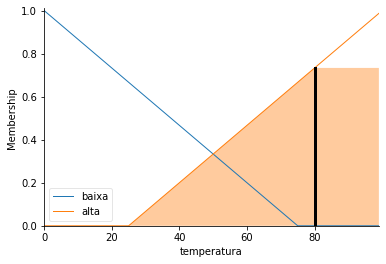

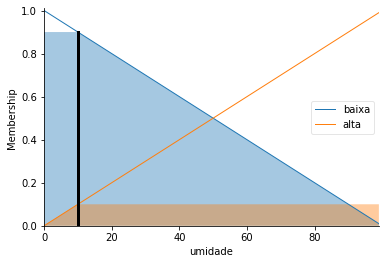

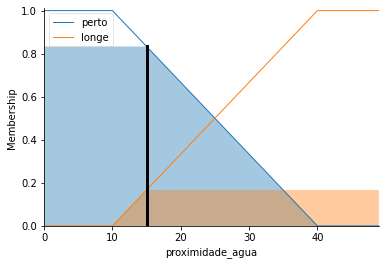

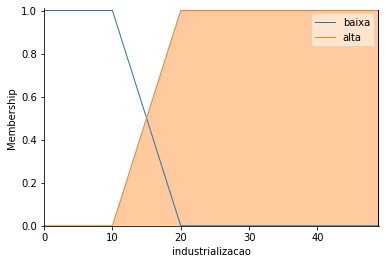

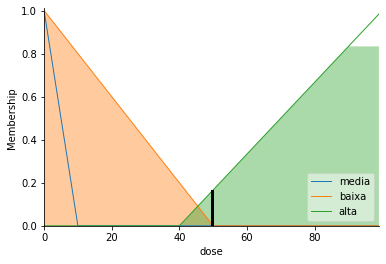

In [ ]:
temperatura.view(sim=dose_simulador)
umidade.view(sim=dose_simulador)
proximidade_agua.view(sim=dose_simulador)
industrializacao.view(sim=dose_simulador)
dose.view(sim=dose_simulador)